In [85]:
from pib_lib import particle_in_a_box as pib    # Main library providing the <Particle_in_Box_State> class
from pib_lib import update_plot as up           # library to provide basic visualization functionality based on matplotlib
from pib_lib import Special_States as spst      # Collection of special preset states (Gaussian wave packets)
from pib_lib import Backend as bk
import numpy as np
from scipy.integrate import quad
from matplotlib import pyplot as plt

In [86]:
L = np.pi
m = 1
states = [1,2,3]
amps = [1,1j,1+1j]
boudary_condition = "anti_symmetric"
gamma = 10

state = pib.Particle_in_Box_State(boudary_condition, L, m, states, amps, gamma)

In [87]:
state.L = 2*np.pi              # change length of the interval
state.m = 2                         # change mass of the particle
state.case = "dirichlet"            # change the boundary condition
state.gamma = 100

state.add_state([4,5], [2, 3])      # add states with quantum numbers 4 and 5 and relative amplitudes of 2 and 3 respectively
state.remove_state([1,4])           # remove the previously added states with quantum numbers 1 and 4

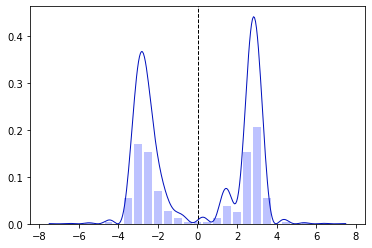

In [88]:
fig = plt.figure()
ax = fig.add_subplot()
new_momentum_plot = up.new_momentum_space_plot(state, fig, ax)
new_momentum_plot["abs_square"].plot_config(color=up.light_blue)
momentum_plot = up.momentum_space_plot(state, fig, ax)

plots = up.Update_Plot_Collection(fig, new_momentum_plot, momentum_plot)
plots.set_n_bound(15)
lines = plots.plot()

In [89]:
new_k_distr = lambda n: np.abs(state.new_k_space_wavefunction(n, 0))**2
k_distr = lambda k: np.abs(state.k_space_wavefunction(k, 0))**2

In [90]:
kn = state.boundary_lib.get_kn(np.arange(-15, 16))
amp = new_k_distr(np.arange(-100, 100))
np.sum(amp)

0.9999975008962199

In [91]:
quad(k_distr, -100, 100)

C:\Users\User01\AppData\Local\Temp\ipykernel_8592\3712046480.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(k_distr, -100, 100)


(0.9999996805461469, 6.952070146164867e-07)